# 02. Feature Engineering & Selection

## Objectives
1. Analyze feature importance.
2. Prepare features for Hybrid Quantum Model (dimensionality reduction if needed for qubit limits).

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join('..', '..')))
from ml_engine.dataset import CreditCardDataset

### 1. Feature Importance with Random Forest
Before training our complex models, let's see which features strictly matter.

In [2]:
from sklearn.ensemble import RandomForestClassifier

dataset = CreditCardDataset()
X_train, X_test, y_train, y_test = dataset.preprocess_and_split(use_smote=False) # Use raw data for importance check

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Retrieve feature names (columns V1...V28, Amount)
feature_names = dataset.df.drop('Class', axis=1).columns

### 2. Visualize Feature Importance

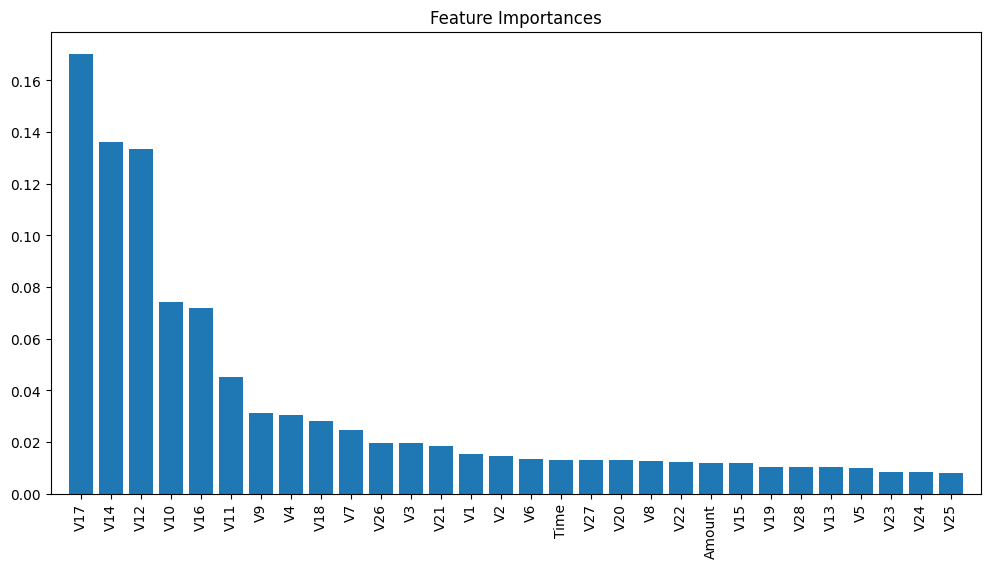

In [3]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### 3. PCA for Quantum Encoding (Optional)
Quantum circuits have limited qubits. If we wanted to feed data directly into qubits without a classical NN compressor layer, we would need PCA to reduce dimensions to e.g., 4 or 8.

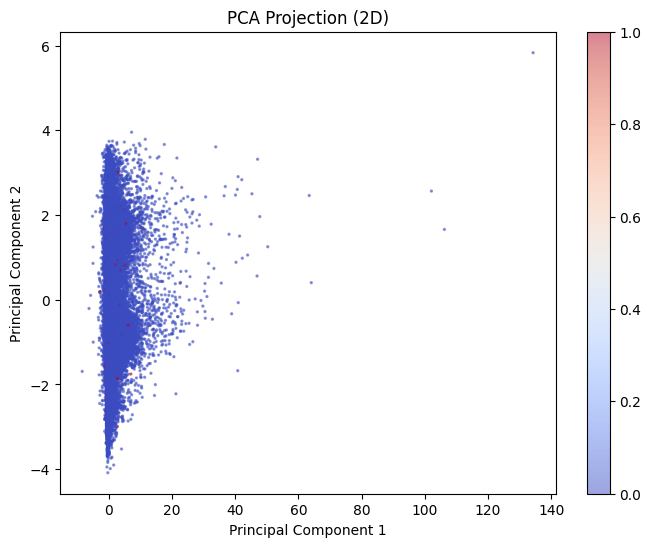

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5, s=2)
plt.title('PCA Projection (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()